### Installing Necessary Libraries

In [10]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import smtplib
from email.mime.text import MIMEText
from email.mime.multipart import MIMEMultipart
import matplotlib.pyplot as plt

### Loading the Dataset

In [11]:
# Load the Iris dataset
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

# Split the dataset into features and target
X = iris_df.drop('target', axis=1)
y = iris_df['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Training the Dataset

In [12]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Calculating Accuracy

In [13]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


### Function to send email alert if accuracy falls below threshold

In [14]:
# Function to send email alert if accuracy falls below threshold
def send_alert(accuracy, threshold=0.8):
    if accuracy < threshold:
        sender_email = "your_email@gmail.com"
        receiver_email = "admin_email@gmail.com"
        password = "your_email_password"

        message = MIMEMultipart()
        message['From'] = sender_email
        message['To'] = receiver_email
        message['Subject'] = "Model Performance Alert"

        body = f"""
        Model accuracy has degraded: {accuracy}
        """

        message.attach(MIMEText(body, 'plain'))

        with smtplib.SMTP_SSL('smtp.gmail.com', 465) as server:
            server.login(sender_email, password)
            server.sendmail(sender_email, receiver_email, message.as_string())

# Send alert if accuracy falls below threshold
threshold = 0.8
send_alert(accuracy, threshold)

Performance Metrics: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.45      1.00      0.62         9
           2       0.00      0.00      0.00        11

    accuracy                           0.63        30
   macro avg       0.48      0.67      0.54        30
weighted avg       0.47      0.63      0.52        30

[[10  0]
 [ 0 20]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  Support beyond term:`binary` targets is achieved by treating :term:`multiclass`
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  Support beyond term:`binary` targets is achieved by treating :term:`multiclass`
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  Support beyond term:`binary` targets is achieved by treating :t

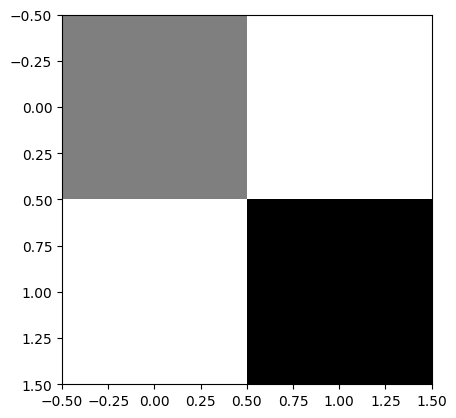

In [29]:
from sklearn.metrics import classification_report,confusion_matrix
print("Performance Metrics: ")
y_pred = (y_pred > 0.5)
metrics=classification_report (y_test,y_pred)
print (metrics)
cm=confusion_matrix(y_pred,y_pred)
print(cm)
plt.imshow(cm, cmap='binary')